<a href="https://colab.research.google.com/github/ftk1000/py_lessons/blob/main/text_summarizer_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# text_summarizer_v1.ipynb
# 2022.02.05
# https://github.com/edubey/text-summarizer/commit/2458c2f515af62d74a12b03fa4b9d65b88f970d8

In [2]:
from nltk.corpus import stopwords
from nltk.cluster.util import cosine_distance
import numpy as np
import networkx as nx

def read_article(file_name):
    file = open(file_name, "r")
    filedata = file.readlines()
    article = filedata[0].split(". ")
    sentences = []

    for sentence in article:
        print(sentence)
        sentences.append(sentence.replace("[^a-zA-Z]", " ").split(" "))
    sentences.pop() 

    return sentences

def sentence_similarity(sent1, sent2, stopwords=None):
    if stopwords is None:
        stopwords = []

    sent1 = [w.lower() for w in sent1]
    sent2 = [w.lower() for w in sent2]

    all_words = list(set(sent1 + sent2))

    vector1 = [0] * len(all_words)
    vector2 = [0] * len(all_words)

    # build the vector for the first sentence
    for w in sent1:
        if w in stopwords:
            continue
        vector1[all_words.index(w)] += 1

    # build the vector for the second sentence
    for w in sent2:
        if w in stopwords:
            continue
        vector2[all_words.index(w)] += 1

    return 1 - cosine_distance(vector1, vector2)

def build_similarity_matrix(sentences, stop_words):
    # Create an empty similarity matrix
    similarity_matrix = np.zeros((len(sentences), len(sentences)))

    for idx1 in range(len(sentences)):
        for idx2 in range(len(sentences)):
            if idx1 == idx2: #ignore if both are same sentences
                continue 
            similarity_matrix[idx1][idx2] = sentence_similarity(sentences[idx1], sentences[idx2], stop_words)

    return similarity_matrix


def generate_summary(file_name, top_n=5):
    stop_words = stopwords.words('english')
    summarize_text = []

    # Step 1 - Read text anc split it
    sentences =  read_article(file_name)

    # Step 2 - Generate Similary Martix across sentences
    sentence_similarity_martix = build_similarity_matrix(sentences, stop_words)

    # Step 3 - Rank sentences in similarity martix
    sentence_similarity_graph = nx.from_numpy_array(sentence_similarity_martix)
    scores = nx.pagerank(sentence_similarity_graph)

    # Step 4 - Sort the rank and pick top sentences
    ranked_sentence = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)    
    print("Indexes of top ranked_sentence order are ", ranked_sentence)    

    for i in range(top_n):
      summarize_text.append(" ".join(ranked_sentence[i][1]))

    # Step 5 - Offcourse, output the summarize texr
    print("Summarize Text: \n", ". ".join(summarize_text))

# let's begin
# generate_summary( "msft.txt", 2)

In [3]:
text = 'WASHINGTON - The Trump administration has ordered the military to start withdrawing roughly 7,000 troops from Afghanistan in the coming months, two defense officials said Thursday, an abrupt shift in the 17-year-old war there and a decision that stunned Afghan officials, who said they had not been briefed on the plans.President Trump made the decision to pull the troops - about half the number the United States has in Afghanistan now - at the same time he decided to pull American forces out of Syria, one official said.The announcement came hours after Jim Mattis, the secretary of defense, said that he would resign from his position at the end of February after disagreeing with the president over his approach to policy in the Middle East.The whirlwind of troop withdrawals and the resignation of Mr. Mattis leave a murky picture for what is next in the United States’ longest war, and they come as Afghanistan has been troubled by spasms of violence afflicting the capital, Kabul, and other important areas. The United States has also been conducting talks with representatives of the Taliban, in what officials have described as discussions that could lead to formal talks to end the conflict.Senior Afghan officials and Western diplomats in Kabul woke up to the shock of the news on Friday morning, and many of them braced for chaos ahead. Several Afghan officials, often in the loop on security planning and decision-making, said they had received no indication in recent days that the Americans would pull troops out. The fear that Mr. Trump might take impulsive actions, however, often loomed in the background of discussions with the United States, they said.They saw the abrupt decision as a further sign that voices from the ground were lacking in the debate over the war and that with Mr. Mattis’s resignation, Afghanistan had lost one of the last influential voices in Washington who channeled the reality of the conflict into the White House’s deliberations.The president long campaigned on bringing troops home, but in 2017, at the request of Mr. Mattis, he begrudgingly pledged an additional 4,000 troops to the Afghan campaign to try to hasten an end to the conflict.Though Pentagon officials have said the influx of forces - coupled with a more aggressive air campaign - was helping the war effort, Afghan forces continued to take nearly unsustainable levels of casualties and lose ground to the Taliban.The renewed American effort in 2017 was the first step in ensuring Afghan forces could become more independent without a set timeline for a withdrawal. But with plans to quickly reduce the number of American troops in the country, it is unclear if the Afghans can hold their own against an increasingly aggressive Taliban.Currently, American airstrikes are at levels not seen since the height of the war, when tens of thousands of American troops were spread throughout the country. That air support, officials say, consists mostly of propping up Afghan troops while they try to hold territory from a resurgent Taliban.'
text

'WASHINGTON - The Trump administration has ordered the military to start withdrawing roughly 7,000 troops from Afghanistan in the coming months, two defense officials said Thursday, an abrupt shift in the 17-year-old war there and a decision that stunned Afghan officials, who said they had not been briefed on the plans.President Trump made the decision to pull the troops - about half the number the United States has in Afghanistan now - at the same time he decided to pull American forces out of Syria, one official said.The announcement came hours after Jim Mattis, the secretary of defense, said that he would resign from his position at the end of February after disagreeing with the president over his approach to policy in the Middle East.The whirlwind of troop withdrawals and the resignation of Mr. Mattis leave a murky picture for what is next in the United States’ longest war, and they come as Afghanistan has been troubled by spasms of violence afflicting the capital, Kabul, and other

In [10]:
sents = text.split(". ")
print(len(sents))
# print(sents)
sents

10


['WASHINGTON - The Trump administration has ordered the military to start withdrawing roughly 7,000 troops from Afghanistan in the coming months, two defense officials said Thursday, an abrupt shift in the 17-year-old war there and a decision that stunned Afghan officials, who said they had not been briefed on the plans.President Trump made the decision to pull the troops - about half the number the United States has in Afghanistan now - at the same time he decided to pull American forces out of Syria, one official said.The announcement came hours after Jim Mattis, the secretary of defense, said that he would resign from his position at the end of February after disagreeing with the president over his approach to policy in the Middle East.The whirlwind of troop withdrawals and the resignation of Mr',
 'Mattis leave a murky picture for what is next in the United States’ longest war, and they come as Afghanistan has been troubled by spasms of violence afflicting the capital, Kabul, and o

In [6]:
# def get_sentences(text):
#     # file = open(file_name, "r")
#     # filedata = file.readlines()
#     # article = filedata[0].split(". ")
#     article = text.split(". ")
#     sentences = []

#     for sentence in article:
#         # print(sentence)
#         sentences.append(sentence.replace("[^a-zA-Z]", " ").split(" "))
#     sentences.pop() 

#     return sentences

In [16]:
#  stopwords.words('english')
# stopwords

In [17]:
# build_similarity_matrix(sentences = sents, stop_words = stopwords.words('english') )
build_similarity_matrix(sentences = sents, stop_words = [] )


array([[0.        , 0.97705649, 0.98336859, 0.96934015, 0.82664914,
        0.98788142, 0.97851689, 0.98723281, 0.98097153, 0.9377155 ],
       [0.97705649, 0.        , 0.97878003, 0.95637396, 0.82837654,
        0.96970586, 0.96077899, 0.98111962, 0.97698216, 0.92260743],
       [0.98336859, 0.97878003, 0.        , 0.97526043, 0.77330684,
        0.96981893, 0.97100684, 0.98477739, 0.97148688, 0.92047187],
       [0.96934015, 0.95637396, 0.97526043, 0.        , 0.70335385,
        0.94698791, 0.9716556 , 0.97772279, 0.96479112, 0.90586456],
       [0.82664914, 0.82837654, 0.77330684, 0.70335385, 0.        ,
        0.83217329, 0.76651693, 0.79740598, 0.81353618, 0.77118316],
       [0.98788142, 0.96970586, 0.96981893, 0.94698791, 0.83217329,
        0.        , 0.97014502, 0.9730346 , 0.97802087, 0.9174306 ],
       [0.97851689, 0.96077899, 0.97100684, 0.9716556 , 0.76651693,
        0.97014502, 0.        , 0.97876481, 0.97353007, 0.91617734],
       [0.98723281, 0.98111962, 0.9847773

# Experiment with functions defined above

In [19]:
summarize_text = []
# Step 1 - Read text anc split it
# sentences =  read_article(file_name)
sentences = text.split(". ")

# Step 2 - Generate Similary Martix across sentences
sentence_similarity_martix = build_similarity_matrix(sentences, stop_words=[])

# Step 3 - Rank sentences in similarity martix
sentence_similarity_graph = nx.from_numpy_array(sentence_similarity_martix)
scores = nx.pagerank(sentence_similarity_graph)

# Step 4 - Sort the rank and pick top sentences
ranked_sentence = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)    
print("Indexes of top ranked_sentence order are ", ranked_sentence)    

top_n=5
for i in range(top_n):
  summarize_text.append("".join(ranked_sentence[i][1]))

# Step 5 - Offcourse, output the summarize texr
print("Summarize Text: \n", ". ".join(summarize_text))

Indexes of top ranked_sentence order are  [(0.10285384874241342, 'WASHINGTON - The Trump administration has ordered the military to start withdrawing roughly 7,000 troops from Afghanistan in the coming months, two defense officials said Thursday, an abrupt shift in the 17-year-old war there and a decision that stunned Afghan officials, who said they had not been briefed on the plans.President Trump made the decision to pull the troops - about half the number the United States has in Afghanistan now - at the same time he decided to pull American forces out of Syria, one official said.The announcement came hours after Jim Mattis, the secretary of defense, said that he would resign from his position at the end of February after disagreeing with the president over his approach to policy in the Middle East.The whirlwind of troop withdrawals and the resignation of Mr'), (0.1024027936463454, 'Mattis, he begrudgingly pledged an additional 4,000 troops to the Afghan campaign to try to hasten an

In [20]:
summarize_text



['WASHINGTON - The Trump administration has ordered the military to start withdrawing roughly 7,000 troops from Afghanistan in the coming months, two defense officials said Thursday, an abrupt shift in the 17-year-old war there and a decision that stunned Afghan officials, who said they had not been briefed on the plans.President Trump made the decision to pull the troops - about half the number the United States has in Afghanistan now - at the same time he decided to pull American forces out of Syria, one official said.The announcement came hours after Jim Mattis, the secretary of defense, said that he would resign from his position at the end of February after disagreeing with the president over his approach to policy in the Middle East.The whirlwind of troop withdrawals and the resignation of Mr',
 'Mattis, he begrudgingly pledged an additional 4,000 troops to the Afghan campaign to try to hasten an end to the conflict.Though Pentagon officials have said the influx of forces - coupl

In [21]:
sentence_similarity_graph

# Plot the similarity graph

https://networkx.org/documentation/stable/auto_examples/basic/plot_simple_graph.html#sphx-glr-auto-examples-basic-plot-simple-graph-py

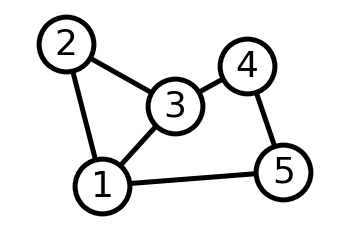

In [22]:
# https://networkx.org/documentation/stable/auto_examples/basic/plot_simple_graph.html#sphx-glr-auto-examples-basic-plot-simple-graph-py
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(1, 5)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(4, 5)

# explicitly set positions
pos = {1: (0, 0), 2: (-1, 0.3), 3: (2, 0.17), 4: (4, 0.255), 5: (5, 0.03)}

options = {
    "font_size": 36,
    "node_size": 3000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 5,
    "width": 5,
}
nx.draw_networkx(G, pos, **options)

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

NetworkXError: ignored

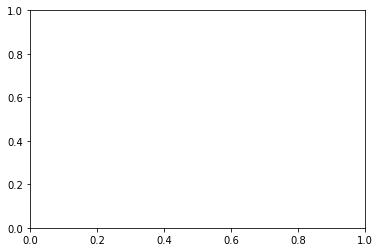

In [25]:
import networkx as nx
import matplotlib.pyplot as plt

# G = nx.Graph()
# G.add_edge(1, 2)
# G.add_edge(1, 3)
# G.add_edge(1, 5)
# G.add_edge(2, 3)
# G.add_edge(3, 4)
# G.add_edge(4, 5)


# explicitly set positions
# pos = {1: (0, 0), 2: (-1, 0.3), 3: (2, 0.17), 4: (4, 0.255), 5: (5, 0.03)}

G=sentence_similarity_graph
options = {
    "font_size": 36,
    "node_size": 3000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 5,
    "width": 5,
}
nx.draw_networkx(G, pos, **options)

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

In [23]:
# # Set margins for the axes so that nodes aren't clipped
# ax = plt.gca()
# ax.margins(0.20)
# plt.axis("off")
# plt.show()

type(G)

networkx.classes.graph.Graph

In [24]:
type(sentence_similarity_graph)
G=sentence_similarity_graph

networkx.classes.graph.Graph